In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from mpl_toolkits.mplot3d import Axes3D

In [62]:
# 0 is female and 1 is male
df = pd.read_excel('all.xlsx',sheet_name=1)
dat = df.dropna()
data = dat
# print(np.where(dat['sensation']==3))
# data=dat.drop([426])
len(dat)

770

In [63]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Thermal sensation')
    plt.xlabel('Thermal comfort')

In [64]:
sensation = np.round(np.array(data['sensation']))
comf = np.round(np.array(data['comfort']))

In [65]:
matrix_sensation4 = confusion_matrix(sensation, comf)

Confusion matrix, without normalization


770

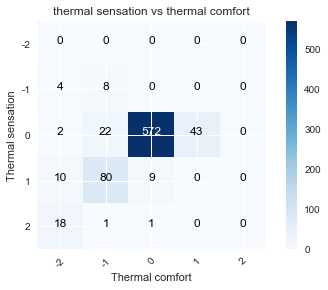

In [66]:
#class_names = [-1,0,1,2,3]
class_names = [-2,-1,0,1,2,]
plot_confusion_matrix(matrix_sensation4,classes=class_names,
                      title='thermal sensation vs thermal comfort')
np.sum(matrix_sensation4)

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0, 0.5, 'indoor air temperature'), Text(0.5, 0, 'satisfaction')]

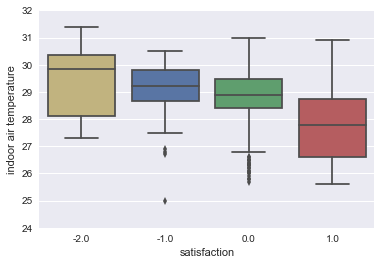

In [53]:
my_pal = {-2:"y",-1: "b", 0: "g", 1:"r",2:"purple",3:"black"}
plt.ylim(24,32)
#sns.boxplot(x=data['sensation'],y=data['temperature'],data=data,palette=my_pal).set(ylabel='indoor air temperature')
sns.boxplot(x=data['comfort'],y=data['temperature'],data=data,palette=my_pal).set(ylabel='indoor air temperature',xlabel='satisfaction')

In [24]:
medians = data.groupby(['sensation'])['temperature'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
medians

array([28.1, 28.8, 29.3, 29.9, 30.3])

/Users/lusiliang93/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


[Text(0, 0.5, 'skin temperature'), Text(0.5, 0, 'satisfaction')]

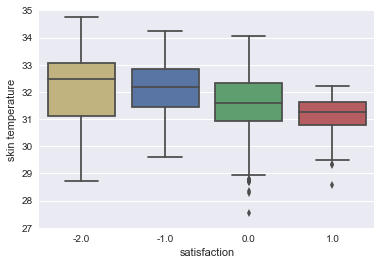

In [67]:
my_pal = {-2:"y",-1: "b", 0: "g", 1:"r",2:"purple",3:"black"}
plt.ylim(27,35)
#sns.boxplot(x=data['sensation'],y=data['skin'],data=data,palette=my_pal).set(ylabel='skin temperature')
sns.boxplot(x=data['comfort'],y=data['skin'],data=data,palette=my_pal).set(ylabel='skin temperature',xlabel='satisfaction')

In [33]:
medians = data.groupby(['sensation'])['skin'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
medians

array([31.47 , 31.53 , 32.22 , 32.875])